In [1257]:
import json
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import os
from pprint import pprint
from scipy.stats import ttest_ind

num_evals = 5
evals = {}

In [1448]:
task_dir = '/Users/ethanperez/research/ParlAI/parlai/mturk/core/run_data/live/context_evaluator_'

task_setup = [
# ## Persuading Humans (Dev)
# ('race', 'question', 1554052233, 'No Passage'),
# ('race', 'quote and question', 1554006689, 'TFIDF(S,[Q;A])'),
# ('race', 'quote and question', 1554130485, 'TFIDF(S,A)'),
# ('race', 'quote and question', 1554069931, 'BERT Base'),
# ('race', 'quote and question', 1554072277, 'Pred search'),
# ('race', 'quote and question', 1554132868, 'Pred Δp(A)'),
# ## Persuading Humans
# ('race', 'quote and question', 1556832343, 'Pred search (Almost complete)'),
# ('race', 'quote and question', 1557155351, 'Bi-Ranker'),
# ## Persuading Humans: FINAL
# ('race', 'question', 1557351318, 'No Passage'),
# ('race', 'quote and question', 1556671432, 'TFIDF(S,[Q;A])'),
# ('race', 'quote and question', 1556725767, 'TFIDF(S,A)'),
# ('race', 'quote and question', 1556739336, 'FastText(S,A)'),
# ('race', 'quote and question', 1557144204, 'BERT Base'),
# ('race', 'quote and question', 1558102264, 'BERT Large'),
# ('race', 'quote and question', 1556892630, 'Pred search'),
# ('race', 'quote and question', 1556809031, 'Pred p(A)'),
# ('race', 'quote and question', 1556756789, 'Pred Δp(A)'),  # (race.m=sl-sents.i.best.e)
# ('race', 'quote and question', 1557420471, 'Human 1'),
# ('race', 'quote and question', 1558016111, 'Human 2'),
# ('race', 'quote and question', 1558028902, 'Human 3'),
# ## Human QA on Summary
# ('race', 'quotes and question', 1555946909, 'FastText(S,A) (lower pay)'),
# ('race', 'quotes and question', 1555952058, 'BERT Base Best Epoch'),  # (6-10 sentence incorrectly placed at end)
# ('race', 'quotes and question', 1556939750, 'Pred Δp(A) (lower pay)'),
# ('race', 'quotes and question', 1557093902, 'Bi-Ranker'),
# ## Human QA on Summary: FINAL
# ('race', 'passage and question', 1555823963, 'Full Passage'),
# ('race', 'quotes and question', 1558238519, 'First N'),
# ('race', 'quotes and question', 1558203764, 'TFIDF(S,Q)'),
# ('race', 'quotes and question', 1558142288, 'FastText(S,Q)'),
# ('race', 'quotes and question', 1557189780, 'TFIDF(S,[Q;A])'),
# ('race', 'quotes and question', 1557164593, 'TFIDF(S,A)'),
# ('race', 'quotes and question', 1557234076, 'FastText(S,A)'),
# ('race', 'quotes and question', 1557085110, 'BERT Base'),  # Last Epoch
# ('race', 'quotes and question', 1558119911, 'BERT Large'),  # Not sure if this completed
# ('race', 'quotes and question', 1556987177, 'Pred search'),
# ('race', 'quotes and question', 1556977072, 'Pred p(A)'),
# ('race', 'quotes and question', 1556999857, 'Pred Δp(A)'),
# ('race', 'quotes and question', 1557432288, 'Human 1'),
# ('race', 'quotes and question', 1558039471, 'Human 2'),
# ('race', 'quotes and question', 1558054770, 'Human 3'),
# ## Persuading Humans
# ('dream', 'quote and question', 1556670413, 'Bi-Ranker'),
# ('dream', 'quote and question', 1555333992, 'Pred search (ToM)'),
# ## Persuading Humans: FINAL
# ('dream', 'question', 1554582693, 'No Passage'),
# ('dream', 'quote and question', 1554596686, 'TFIDF(S,[Q;A])'),
# ('dream', 'quote and question', 1554587404, 'TFIDF(S,A)'),
# ('dream', 'quote and question', 1554662280, 'FastText(S,A)'),
# ('dream', 'quote and question', 1554675304, 'BERT Base'),
# ('dream', 'quote and question', 1558108101, 'BERT Large'),
# ('dream', 'quote and question', 1554685131, 'Pred search'),
# ('dream', 'quote and question', 1554692472, 'Pred p(A)'),
# ('dream', 'quote and question', 1554729998, 'Pred Δp(A)'),
# ('dream', 'quote and question', 1558028987, 'Human 1'),
# ('dream', 'quotes and question', 1558362124, 'Human 2'),
# ('dream', 'quotes and question', ?, 'Human 3'),
# ## Human QA on Summary
# ('dream', 'question, answers, and quotes', 1555707929, 'TFIDF(S,A)'),  # 64.21%: (Less filter / no feedback)
# ('dream', 'question, answers, and quotes', 1555722489, 'BERT Base'),  # 65.38%: (Less filter / no feedback)
# ('dream', 'question and quotes', 1555789302, 'Pred search'),  # 75.17% (4/5 filter)
# ('dream', 'question and quotes', 1555812443, 'Pred search'),  # 79.32% Actually: quotes and question (4/5 filter)
# ('dream', 'quotes and question', 1555946647, 'BERT Base (RACE -> DREAM)'),  # (4 sentences incorrectly placed at end) (80.84%)
# ('dream', 'quotes and question', 1556740293, 'Bi-Ranker'),
# ## Human QA on Summary: FINAL
# ('dream', 'passage and question', 1555804551, 'Full Passage'),
# ('dream', 'quotes and question', 1558142116, 'First N'),
# ('dream', 'quotes and question', 1558120652, 'TFIDF(S,Q)'),
# ('dream', 'quotes and question', 1558059069, 'FastText(S,Q)'),
# ('dream', 'quotes and question', 1556811067, 'TFIDF(S,[Q;A])'),
# ('dream', 'quotes and question', 1556757043, 'TFIDF(S,A)'),
# ('dream', 'quotes and question', 1555823257, 'FastText(S,A)'),
# ('dream', 'quotes and question', 1556727396, 'BERT Base'),
# ('dream', 'quotes and question', 1558101763, 'BERT Large'),
# ('dream', 'quotes and question', 1556832115, 'Pred search'),
# ('dream', 'quotes and question', 1556892896, 'Pred p(A)'),
# ('dream', 'quotes and question', 1556938429, 'Pred Δp(A)'),
# ('dream', 'quotes and question', 1558016251, 'Human 1'),
# ('dream', 'quotes and question', ?, 'Human 2'),
# ('dream', 'quotes and question', ?, 'Human 3'),
]

dataset, prompt_type, task_id, name = task_setup[-1]
split = None  # 'middle', 'high', None


# Set useful variables
task_dir += str(task_id)
if dataset != 'race':
    split = None
num_options = 3 if dataset == 'dream' else 4
options = ['A', 'B', 'C', 'D'][:num_options]
debate_mode_to_option = {'Ⅰ': 'A', 'Ⅱ': 'B', 'Ⅲ': 'C', 'Ⅳ': 'D', 'ⅰ': 'A', 'ⅱ': 'B', 'ⅲ': 'C', 'ⅳ': 'D', None: None}
option_to_debate_mode = {'A': 'Ⅰ', 'B': 'Ⅱ', 'C': 'Ⅲ', 'D': 'Ⅳ', 'A': 'ⅰ', 'B': 'ⅱ', 'C': 'ⅲ', 'D': 'ⅳ', None: None}
question_type_labels = ['a', 'c', 'l', 'm', 's'] if dataset == 'dream' else ['a', 'b', 'c', 'd', 'e']

# if (dataset == 'dream') and (prompt_type == 'quote and question'):
#     question_type_labels = []

# Read HIT data
hit_results = []
num_passed_test = 0
for hit_dir in os.listdir(task_dir):
    if hit_dir.startswith('o_'):
        continue
    num_passed_test += 1
    with open(os.path.join(task_dir, hit_dir, 'custom/data.json'), 'r') as file:
        hit_results.append(json.load(file))
        file.close()
if len(os.listdir(task_dir)) != num_passed_test:
    num_total_tested = len(os.listdir(task_dir)) - num_passed_test
    print('Qualified:', round((100. * num_passed_test) / num_total_tested, 2), '%')

Qualified: 52.31 %


In [1449]:
num_valid_hits, num_rejected_hits, num_incomplete_hits = 0, 0, 0
metrics = {}
task_ratings = {i: 0 for i in range(11)}
quote_ratings = []
durations = []
worker_durations = []
accuracy_by_worker = {}
max_response_freqs = []
worker_ids = []
hits_by_qid = {}
debate_mode_counts = {debate_mode: 0 for debate_mode in debate_mode_to_option.keys()}

for hit_result in hit_results:
    if ((len(hit_result['reject_reasons']) > 0) or
        (len(hit_result['block_reasons']) > 0)):
        num_rejected_hits += 1
        print(hit_result['worker_id'], hit_result['assignment_id'],
              '| reject_reasons:', hit_result['reject_reasons'],
              '| block_reasons:', hit_result['block_reasons'],
              '| bonus_reasons: ' + str(hit_result['bonus_reasons']) if 'bonus_reasons' in hit_result else '')
    elif hit_result['feedback'] is None:
        num_incomplete_hits += 1
        continue
    
    worker_ids.append(hit_result['worker_id'])
    num_valid_hits += 1
    if (hit_result['task_rating'] is not None) and (hit_result['task_rating'].isdigit()):
        task_ratings[int(hit_result['task_rating'])] += 1
    if (hit_result.get('quote_rating') is not None) and (hit_result['quote_rating'].isdigit()):
        quote_ratings.append(int(hit_result['quote_rating']))
    for qtype, qtype_accuracy in hit_result['accuracy'].items():
        accuracy_by_worker[qtype] = accuracy_by_worker.get(qtype, []) + [qtype_accuracy]
    
    hit_durations = []
    response_option_counts = {option: 0 for option in options}
    responses = []
    for prompt in hit_result['data']:
        qid = prompt['sample']['qid']
        if (split is not None) and (split not in qid):
            continue
        hits_by_qid[qid] = hits_by_qid.get(qid, [])
        hits_by_qid[qid].append(prompt)
        debate_mode_counts[prompt['sample']['debate_mode']] += 1
        stance = debate_mode_to_option[prompt['sample']['debate_mode']]
        answer = prompt['sample']['eval_labels'][0]
        human_correct = (prompt['response'] == answer)
        assert answer in options, 'Answer must be in options.'
        
        # Calculate metrics
        if qid not in metrics:
            metrics[qid] = {
                option: {
                    'num': 0,
                    'num_correct': 0,
                    'num_correct_debate_mode': 0,
                    'num_incorrect_debate_mode': 0,
                    'num_correct_with_correct_debate_mode': 0,
                    'num_correct_with_incorrect_debate_mode': 0,
                    'num_debate_mode_responses': 0,
                    'is_debate_mode_response': []
                }
                for option in ([None] if stance is None else options)
            }
#             for qtype in question_type_labels:
#                 metrics[qid][qtype] = {
#                     'num': 0,
#                     'num_correct': 0,
#                 }
            metrics[qid]['answer'] = answer
        metrics[qid]['qtype'] = metrics[qid].get('qtype', set([]))
        for qtype in set(''.join(prompt['sample'].get('question_type_labels', []))):
            qtype = qtype.lower()
            metrics[qid]['qtype'].add(qtype)
#             if qtype not in metrics[qid]:
#                 print('Did you set `dataset` appropriately?')
#             metrics[qid][qtype]['num'] += 1
#             metrics[qid][qtype]['num_correct'] += human_correct
        prompt_metrics = metrics[qid][stance]
        prompt_metrics['num'] += 1
        prompt_metrics['num_correct'] += human_correct
        if stance == answer:
            prompt_metrics['num_correct_with_correct_debate_mode'] += human_correct
            prompt_metrics['num_correct_debate_mode'] += 1
        else:
            prompt_metrics['num_correct_with_incorrect_debate_mode'] += human_correct
            prompt_metrics['num_incorrect_debate_mode'] += 1
        prompt_metrics['num_debate_mode_responses'] += (prompt['response'] == stance)
        prompt_metrics['is_debate_mode_response'].append(prompt['response'] == stance)
        
        hit_durations.append(prompt['duration'] / 1000.)
        response_option_counts[prompt['response']] += 1
        responses.append(prompt['response'])
    duration = np.sum(np.array(hit_durations))
    worker_durations.append(duration)
    durations += hit_durations
    response_options_array = np.array(list(response_option_counts.values()))
    response_options_array = response_options_array / response_options_array.sum()
    max_response_freq = response_options_array.max()
    max_response_freqs.append(max_response_freq)
    acc = round(100 * hit_result['accuracy'][prompt_type])
    print('| Time:', round(duration, 1),
          '| Acc:', acc,
          '| Max Freq:', round(100 * max_response_freq, 1),
          '| Rate:', hit_result['task_rating'],
          '| Feedback:', hit_result['feedback'],
          '| Quote Rating:', None if 'quote_rating' not in hit_result else hit_result['quote_rating'], 
          '| Quote Desc:', None if 'quote_description' not in hit_result else hit_result['quote_description'])

debate_modes_used = list(filter(lambda x: debate_mode_counts[x] > 0, debate_mode_counts.keys()))
debate_modes_used.sort()

good_worker_durations = []
assert len(worker_durations) == len(accuracy_by_worker[prompt_type])
for worker_duration, worker_accuracy in zip(worker_durations, accuracy_by_worker[prompt_type]):
    if worker_accuracy > np.median(np.array(accuracy_by_worker[prompt_type])):
        good_worker_durations.append(worker_duration)

quote_ratings = np.array(quote_ratings)
durations = np.array(durations)
worker_durations = np.array(worker_durations)
good_worker_durations = np.array(good_worker_durations)
max_response_freqs = np.array(max_response_freqs)

quote_ratings.sort()
durations.sort()
worker_durations.sort()
good_worker_durations.sort()
max_response_freqs.sort()

for qtype in accuracy_by_worker:
    accuracy_by_worker[qtype] = np.array(accuracy_by_worker[qtype])
    accuracy_by_worker[qtype].sort()
print('REJECTED:', num_rejected_hits)
print('INCOMPLETE:', num_incomplete_hits)
print('VALID:', num_valid_hits)
print('Median Question Duration:', np.median(durations))
print('Mean Question Duration:', np.mean(durations[int(durations.shape[0] / 10.):int(9. * durations.shape[0] / 10.)]))
print('Min/Median/Mean/Max Worker Duration:',
      round(np.min(worker_durations / 60.), 2), '/',
      round(np.median(worker_durations / 60.), 2), '/',
      round(np.mean(worker_durations / 60.), 2), '/',
      round(np.max(worker_durations / 60.), 2))
print('Min/Median/Mean/Max Good Worker Durations:',
      round(np.min(good_worker_durations / 60.), 2), '/',
      round(np.median(good_worker_durations / 60.), 2),'/',
      round(np.mean(good_worker_durations / 60.), 2), '/',
      round(np.max(good_worker_durations / 60.), 2))
print('Median Worker Accuracy:', np.median(accuracy_by_worker[prompt_type]))
print('Median Max Response Freq:', np.median(max_response_freqs))
print('Quote Rating:',
      '| Mean:', round(quote_ratings.mean(), 2),
      '| Median:', round(np.median(quote_ratings), 2),
      '| Std:', round(np.std(quote_ratings), 2))
# pprint(hit_results[0]['data'][0])
# pprint(hit_results[0])
print('debate_mode_counts:', debate_mode_counts)

qids = list(metrics.keys())
qids.sort()

| Time: 497.6 | Acc: 50 | Max Freq: 40.0 | Rate: 7 | Feedback: i don't know | Quote Rating: 6 | Quote Desc: so-so
| Time: 1074.8 | Acc: 60 | Max Freq: 35.0 | Rate: 6 | Feedback: Put more questions like maybe 30 | Quote Rating: 4 | Quote Desc: They sometimes were useful, and other times they were confusing especially when they were describing a picture or something like that because it had capital letters
| Time: 347.3 | Acc: 60 | Max Freq: 35.0 | Rate: 8 | Feedback: nothing | Quote Rating: 6 | Quote Desc: A bit confusing and scattered.
| Time: 694.4 | Acc: 55 | Max Freq: 35.0 | Rate: 3 | Feedback: No idea | Quote Rating: 3 | Quote Desc: Mistical
| Time: 939.2 | Acc: 40 | Max Freq: 35.0 | Rate: 5 | Feedback: I don't know that you can. It's intentionally vague and convoluted because that's the intent of the hit.  | Quote Rating: 4 | Quote Desc: vague and convuluted
| Time: 527.2 | Acc: 40 | Max Freq: 40.0 | Rate: 9 | Feedback: I have no suggestions, was ok for me. | Quote Rating: 7 | Quo

In [1450]:
def nps(task_ratings):
    num_ratings = sum(list(task_ratings.values()))
    if num_ratings == 0:
        return None

    nps_sum_ratings = 0
    sum_ratings = 0
    for score, num_raters in task_ratings.items():
        sum_ratings += num_raters * score
        if score >= 9:
            nps_sum_ratings += num_raters
        elif score <= 6:
            nps_sum_ratings -= num_raters
    return round(100 * (nps_sum_ratings / float(num_ratings)), 2), round((sum_ratings / float(num_ratings)), 2)

print('NPS, Mean:', nps(task_ratings))

NPS, Mean: (9.17, 7.54)


In [1451]:
debate_logs_dir = '/Users/ethanperez/research/allennlp/eval/race/cross_ranker.large.best_epoch/test/'

debate_logs = []
for debate_mode in debate_modes_used:
    debate_log_filename = os.path.join(debate_logs_dir, debate_mode + '.json')
    with open(debate_log_filename, 'r') as f:
        debate_logs.append({k: v for k, v in json.load(f).items() if k in qids})
#         debate_logs.append({k.replace('dev/', 'test/'): v for k, v in json.load(f).items() if k.replace('dev/', 'test/') in qids})

In [1452]:
debate_logs[0].keys()

dict_keys(['test/high/7560.txt/4', 'test/high/7560.txt/1', 'test/middle/3481.txt/2', 'test/middle/3481.txt/1', 'test/high/7560.txt/2', 'test/middle/7476.txt/2', 'test/high/7560.txt/0', 'test/high/7560.txt/3', 'test/middle/118.txt/2', 'test/middle/7476.txt/3', 'test/middle/7476.txt/1', 'test/middle/3481.txt/3', 'test/middle/118.txt/3', 'test/middle/118.txt/4', 'test/middle/3481.txt/4', 'test/middle/118.txt/0', 'test/middle/3481.txt/0', 'test/middle/7476.txt/0', 'test/middle/7476.txt/4', 'test/middle/118.txt/1', 'test/high/16196.txt/3', 'test/high/16196.txt/1', 'test/middle/8101.txt/4', 'test/high/16196.txt/0', 'test/middle/4590.txt/0', 'test/middle/4590.txt/2', 'test/high/9216.txt/0', 'test/high/16196.txt/2', 'test/high/9216.txt/3', 'test/middle/8101.txt/1', 'test/middle/8101.txt/3', 'test/high/16196.txt/4', 'test/high/17032.txt/0', 'test/middle/4590.txt/3', 'test/middle/4590.txt/4', 'test/high/21191.txt/3', 'test/middle/1193.txt/2', 'test/middle/1193.txt/4', 'test/high/21191.txt/2', 't

In [1453]:
accuracy_by_qtype = {qtype: [] for qtype in question_type_labels}
accuracy_by_sample = []
accuracy_by_sample_correct_debate_mode = []
accuracy_by_sample_incorrect_debate_mode = []
convinced_by_qtype = {qtype: [] for qtype in question_type_labels}
convinced_freqs = []
convinced_freqs_with_correct_debate_mode = []
convinced_freqs_with_incorrect_debate_mode = []
convinced_freqs_by_qtype = {qtype: [] for qtype in question_type_labels}
convinced_freqs_with_correct_debate_mode_by_qtype = {qtype: [] for qtype in question_type_labels}
convinced_freqs_with_incorrect_debate_mode_by_qtype = {qtype: [] for qtype in question_type_labels}
num_evals_by_sample = []
convinced_by_sample = []
# qtypes = []
# qtypes_with_correct_debate_mode = []
# qtypes_with_incorrect_debate_mode = []
stance_prob_to_convinced_freqs = {}
bucket_size = .125

for qid in qids:
    qid_metrics = metrics[qid]
    answer = qid_metrics['answer']
    for qid_metric_key, prompt in qid_metrics.items():
        if qid_metric_key in question_type_labels:
#             qtype = qid_metric_key
#             if qid_metrics[qtype]['num'] > 0:
#                 accuracy_by_qtype[qtype].append(qid_metrics[qtype]['num_correct'] / qid_metrics[qtype]['num'])
#                 convinced_by_qtype[qtype].append(qid_metrics[qtype][])
            continue
        if not (qid_metric_key in [None] + options):
            continue
        stance = qid_metric_key

        # Q-only stats
        prompt_metrics = qid_metrics[stance]
        num_evals_by_sample.append(prompt_metrics['num'])
        convinced_by_sample.append(prompt_metrics['is_debate_mode_response'])
        accuracy_by_sample.append(prompt_metrics['num_correct'] / prompt_metrics['num'])
        for qtype in qid_metrics['qtype']:
            accuracy_by_qtype[qtype].append(prompt_metrics['num_correct'] / prompt_metrics['num'])
        if stance is None:
            continue
        
        # Debater stats
#         if 'num_debate_mode_responses' not in prompt_metrics:
#             print(qid_metric_key, prompt_metrics)
        convinced_freq = prompt_metrics['num_debate_mode_responses'] / prompt_metrics['num']
        if stance == answer:
            convinced_freqs_with_correct_debate_mode.append(convinced_freq)
            for qtype in qid_metrics['qtype']:
                convinced_freqs_with_correct_debate_mode_by_qtype[qtype].append(convinced_freq)
#             qtypes_with_correct_debate_mode.append(qid_metrics['qtype'])
            accuracy_by_sample_correct_debate_mode.append(
                prompt_metrics['num_correct_with_correct_debate_mode'] /
                prompt_metrics['num_correct_debate_mode'])
        else:
            convinced_freqs_with_incorrect_debate_mode.append(convinced_freq)
            for qtype in qid_metrics['qtype']:
                convinced_freqs_with_incorrect_debate_mode_by_qtype[qtype].append(convinced_freq)
#             qtypes_with_incorrect_debate_mode.append(qid_metrics['qtype'])
            accuracy_by_sample_incorrect_debate_mode.append(
                prompt_metrics['num_correct_with_incorrect_debate_mode'] /
                prompt_metrics['num_incorrect_debate_mode'])
        convinced_freqs.append(convinced_freq)
        for qtype in qid_metrics['qtype']:
            convinced_freqs_by_qtype[qtype].append(convinced_freq)
#         qtypes.append(qid_metrics['qtype'])
#         stance_prob = debate_logs[options.index(stance)][qid]['prob_dist'][0][options.index(stance)]
        stance_prob = debate_logs[options.index(stance)][qid]['prob']
        stance_prob_bucket = min(stance_prob // bucket_size, (1. / bucket_size) - 1)
        
        stance_prob_to_convinced_freqs[stance_prob_bucket] = stance_prob_to_convinced_freqs.get(stance_prob_bucket, [])
        stance_prob_to_convinced_freqs[stance_prob_bucket].append(convinced_freq)
#         print(qid, stance, stance_prob, convinced_freq)

# qtypes = np.array(qtypes)
# qtypes_with_correct_debate_mode = np.array(qtypes_with_correct_debate_mode)
# qtypes_with_incorrect_debate_mode = np.array(qtypes_with_incorrect_debate_mode)

# print(accuracy_by_qtype)
accuracy_by_qtype = {qtype: (np.array(accuracy_by_qtype[qtype]).mean(), len(accuracy_by_qtype[qtype])) for qtype in question_type_labels}
pprint(accuracy_by_qtype)

num_evals_by_sample = np.array(num_evals_by_sample)
num_evals_by_sample.sort()
print(num_evals_by_sample)
print('Evals per sample:', num_evals_by_sample.mean())
print('Fraction insuffient evals:', (num_evals_by_sample < 5).mean())

convinced_freqs = np.array(convinced_freqs)
print('Convinced:', round(100 * convinced_freqs.mean(), 2), '% (', 100 * convinced_freqs.mean(), ')')
convinced_freqs_with_correct_debate_mode = np.array(convinced_freqs_with_correct_debate_mode)
print('- Agent is right:', round(100 * convinced_freqs_with_correct_debate_mode.mean(), 2), '% (', 100 * convinced_freqs_with_correct_debate_mode.mean(), ')')
convinced_freqs_with_incorrect_debate_mode = np.array(convinced_freqs_with_incorrect_debate_mode)
print('- Agent is wrong:', round(100 * convinced_freqs_with_incorrect_debate_mode.mean(), 2), '% (', 100 * convinced_freqs_with_incorrect_debate_mode.mean(), ')')

for qtype in question_type_labels:
#     print(len(convinced_freqs_by_qtype[qtype]))
    convinced_freqs_by_qtype[qtype] = np.array(convinced_freqs_by_qtype[qtype]).mean()
    print(len(convinced_freqs_with_correct_debate_mode_by_qtype[qtype]))
    convinced_freqs_with_correct_debate_mode_by_qtype[qtype] = np.array(convinced_freqs_with_correct_debate_mode_by_qtype[qtype]).mean()
#     print(len(convinced_freqs_with_incorrect_debate_mode_by_qtype[qtype]))
    convinced_freqs_with_incorrect_debate_mode_by_qtype[qtype] = np.array(convinced_freqs_with_incorrect_debate_mode_by_qtype[qtype]).mean()

accuracy_by_sample = np.array(accuracy_by_sample)
print('Accuracy:', round(100 * accuracy_by_sample.mean(), 2), '%')
print('Accuracy:', 100 * accuracy_by_sample.mean(), '%')
accuracy_by_sample_correct_debate_mode = np.array(accuracy_by_sample_correct_debate_mode)

num_target_evals = 5
# print('Extra Evals:', round(((100. * (num_evals_by_sample - num_target_evals).sum()) / num_evals_by_sample.sum()), 2), '%')
# num_evals_by_sample.sort()
# print('Evals per sample distribution:', num_evals_by_sample)
# 1.5*3.1*60/(917.5684545454544*26/(20*60))

{'a': (0.49494047619047626, 96),
 'b': (0.512016369047619, 128),
 'c': (0.5087081128747796, 216),
 'd': (0.4894654088050314, 212),
 'e': (0.45223214285714286, 64)}
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Evals per sample: 5.45
F

In [1454]:
1.0 // .125

8.0

In [1455]:
stance_prob_to_convinced_freqs.keys()

dict_keys([3.0, 7.0, 6.0, 4.0, 1.0, 5.0, 0.0, 2.0])

In [1456]:
stance_prob_to_convinced_freq = {k: np.array(v).mean() for k, v in stance_prob_to_convinced_freqs.items()}
stance_probs = list(stance_prob_to_convinced_freq.keys())
stance_probs.sort()

stance_prob_by_convinced_freq = [stance_prob_to_convinced_freq[stance_prob] for stance_prob in stance_probs]

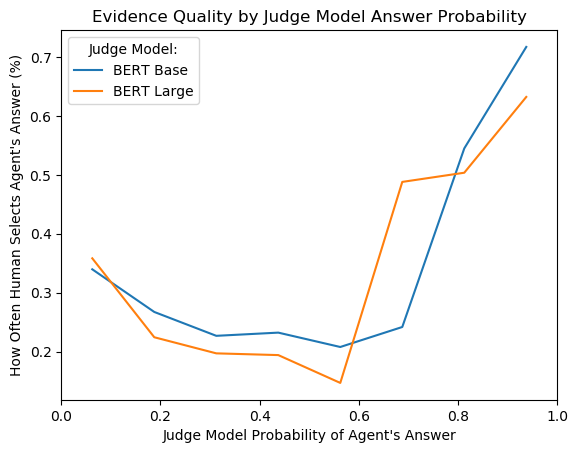

In [1460]:
# plt.plot([(i) * bucket_size for i in range(len(tfidf_o_q_stance_prob_by_convinced_freq))], tfidf_o_q_stance_prob_by_convinced_freq, label='TFIDF(S,[Q;A])')
# plt.plot([(i) * bucket_size for i in range(len(tfidf_o_stance_prob_by_convinced_freq))], tfidf_o_stance_prob_by_convinced_freq, label='TFIDF(S,A)')
# plt.plot([(i) * bucket_size for i in range(len(fasttext_o_stance_prob_by_convinced_freq))], fasttext_o_stance_prob_by_convinced_freq, label='FastText(S,A)')
# plt.plot([(i) * bucket_size for i in range(len(bert_base_stance_prob_by_convinced_freq))], bert_base_stance_prob_by_convinced_freq, label='BERT Base')
# plt.plot([(i) * bucket_size for i in range(len(bert_large_stance_prob_by_convinced_freq))], bert_large_stance_prob_by_convinced_freq, label='BERT Large')
plt.plot([(i) * bucket_size + (bucket_size / 2.) for i in range(len(bert_base_stance_prob_by_convinced_freq_alt))], bert_base_stance_prob_by_convinced_freq_alt, label='BERT Base')
plt.plot([(i) * bucket_size + (bucket_size / 2.) for i in range(len(bert_large_stance_prob_by_convinced_freq_alt))], bert_large_stance_prob_by_convinced_freq_alt, label='BERT Large')
# plt.plot([(i) * bucket_size for i in range(len(stance_prob_by_convinced_freq))], stance_prob_by_convinced_freq, label='BERT Large')

plt.xlabel('Judge Model Probability of Agent\'s Answer')
plt.ylabel('How Often Human Selects Agent\'s Answer (%)')
plt.xlim(0.0, 1.0)
# plt.ylim(0, 1.0)
plt.title('Evidence Quality by Judge Model Answer Probability')
plt.legend(loc='upper left', title='Judge Model:')
plt.savefig('/Users/ethanperez/research/scripts/debate/evidence_quality_by_judge_model_probability.pdf')
plt.show()
# plt.savefig('evidence_quality_by_judge_model_probability.pdf')

In [1447]:
bert_base_stance_prob_by_convinced_freq_alt = stance_prob_by_convinced_freq.copy()

In [1457]:
bert_large_stance_prob_by_convinced_freq_alt = stance_prob_by_convinced_freq.copy()

In [1256]:
stance_prob_by_convinced_freq

[0.35828970331588134,
 0.22424242424242422,
 0.19688644688644688,
 0.19393939393939394,
 0.14666666666666667,
 0.4880952380952381,
 0.5037037037037037,
 0.6324375294672324]

In [1248]:
bert_base_stance_prob_by_convinced_freq

[0.12222222222222226,
 0.12083333333333333,
 0.22643678160919542,
 0.23142857142857143,
 0.29191919191919197,
 0.3201754385964912,
 0.4319148936170213,
 0.5281310211946051]

In [1247]:
stance_prob_by_convinced_freq

[0.3396449704142012,
 0.26719576719576715,
 0.22666666666666668,
 0.23209876543209879,
 0.2076923076923077,
 0.2416666666666667,
 0.545,
 0.7173708920187792]

In [1149]:
bert_large_stance_prob_by_convinced_freq

[0.15656814449917897,
 0.21388888888888888,
 0.2565217391304348,
 0.2409090909090909,
 0.31870748299319723,
 0.3592592592592593,
 0.3998357963875206,
 0.5286691086691087,
 0.7833333333333333]

In [1205]:
tfidf_o_q_stance_prob_by_convinced_freq = stance_prob_by_convinced_freq.copy()

In [1197]:
tfidf_o_stance_prob_by_convinced_freq = stance_prob_by_convinced_freq.copy()

In [1163]:
fasttext_o_stance_prob_by_convinced_freq = stance_prob_by_convinced_freq.copy()

In [1146]:
bert_base_stance_prob_by_convinced_freq = stance_prob_by_convinced_freq.copy()

In [1132]:
bert_large_stance_prob_by_convinced_freq = stance_prob_by_convinced_freq.copy()

In [1110]:
evals[name] = []
for eval_no in range(num_evals):
    evals[name].append([convinced_array[eval_no] for convinced_array in convinced_by_sample])

evals[name] = 100. * np.array(evals[name]).mean(axis=1)
pprint(evals)

for n, eval_values in evals.items():
    print('*****', n, '*****')
    print('MEAN:', round(eval_values.mean(), 1))
    print('STD:', round(eval_values.std(), 2))
    print('STDERR:', round(eval_values.std() / np.sqrt(eval_values.shape[0]), 2))
    print()

for n1, eval_values1 in evals.items():
    for n2, eval_values2 in evals.items():
        print(n1, '/', n2, ':', round(ttest_ind(eval_values1, eval_values2, equal_var=False)[1], 4))

{'BERT Base': array([41.25, 39.25, 36.5 , 36.  , 39.  ]),
 'BERT Large': array([44.25, 37.25, 39.5 , 38.75, 41.25])}
***** BERT Large *****
MEAN: 40.2
STD: 2.4
STDERR: 1.07

***** BERT Base *****
MEAN: 38.4
STD: 1.93
STDERR: 0.86

BERT Large / BERT Large : 1.0
BERT Large / BERT Base : 0.2774
BERT Base / BERT Large : 0.2774
BERT Base / BERT Base : 1.0


In [1111]:
# print('Accuracy/Num-Samples by Q Type:')
if len(accuracy_by_qtype) > 0:
    for qtype in question_type_labels:
        print(round(100. * accuracy_by_qtype[qtype][0], 2))

49.49
51.2
50.87
48.95
45.22


In [1112]:
# print(100. * convinced_freqs.mean())
# print(100. * convinced_freqs_with_correct_debate_mode.mean())
# print(100. * convinced_freqs_with_incorrect_debate_mode.mean())

In [1113]:
# for qtype in question_type_labels:
#     print(100. * convinced_freqs[qtypes == qtype].mean(), convinced_freqs[qtypes == qtype].sum())
    
# for qtype in question_type_labels:
#     print(100. * convinced_freqs_with_correct_debate_mode[qtypes_with_correct_debate_mode == qtype].mean(), convinced_freqs_with_correct_debate_mode[qtypes_with_correct_debate_mode == qtype].sum())
    
# for qtype in question_type_labels:
#     print(100. * convinced_freqs_with_incorrect_debate_mode[qtypes_with_incorrect_debate_mode == qtype].mean(), convinced_freqs_with_incorrect_debate_mode[qtypes_with_incorrect_debate_mode == qtype].sum())

In [1114]:
for qtype in question_type_labels:
    print(100. * convinced_freqs_by_qtype[qtype])
for qtype in question_type_labels:
    print(100. * convinced_freqs_with_correct_debate_mode_by_qtype[qtype])
for qtype in question_type_labels:
    print(100. * convinced_freqs_with_incorrect_debate_mode_by_qtype[qtype])

41.29960317460317
38.798363095238095
39.854497354497354
41.98562443845463
39.0029761904762
77.77777777777779
68.52678571428571
73.64197530864197
72.51572327044025
64.79166666666667
29.14021164021164
28.888888888888893
28.592004703115816
31.80892482779275
30.406746031746028


In [1115]:
print(100. * accuracy_by_sample.mean())
for qtype in question_type_labels:
    print(100. * accuracy_by_qtype[qtype][0])

49.375
49.49404761904763
51.201636904761905
50.870811287477956
48.94654088050314
45.223214285714285


In [1124]:
stance_prob_by_convinced_freq

[0.15656814449917897,
 0.21388888888888888,
 0.2565217391304348,
 0.2409090909090909,
 0.31870748299319723,
 0.3592592592592593,
 0.3998357963875206,
 0.5286691086691087,
 0.7833333333333333]

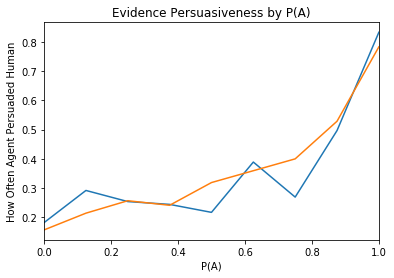